In [3]:
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np

In [4]:
a=torch.tensor([[1,2,3],[4,5,6]])
b=torch.tensor([[1,2],[1,2],[1,2]])
print(torch.mm(a,b))
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[1,2,3],[4,5,6]])
np.multiply(a,b)
a*b

tensor([[ 6, 12],
        [15, 30]])


array([[ 1,  4,  9],
       [16, 25, 36]])

In [34]:
a=[3]
a=torch.tensor(a,dtype=float,requires_grad=True)
b=a**2+2*a
b.backward()
a.grad

tensor([8.], dtype=torch.float64)

In [69]:
a.grad.zero_()
b=a**2+2*a
b.backward()
a.grad

tensor([8.], dtype=torch.float64)

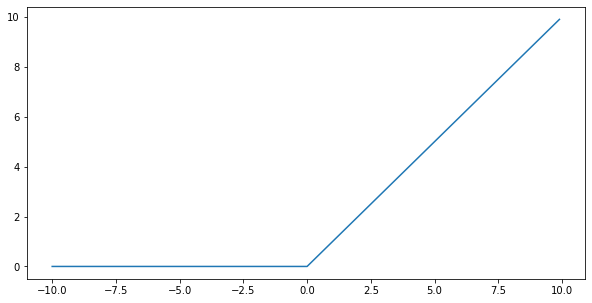

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

from matplotlib import pyplot as plt
x = torch.arange(-10,10,0.1)
y = torch.relu(x)
_,axes = plt.subplots(1,1,figsize=(10,5))
axes.plot(x , y )

In [3]:
a=nn.MaxPool2d((2,2))
a

MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)

In [ ]:
from torch.utils import data
from torchvision import transforms
import numpy as np

class mydataset(data.Dataset):
    def __init__(self,X,y,trans=None):
        super().__init__()
        self.y=y
        self.x=X
        self.trans=trans
    def __len__(self):
        return len(self.x)
    def __getitem__(self,index):
        if(self.trans):
             return self.trans(self.x[index]),self.trans(self.y[index])
        else:
             return self.x[index],self.y[index]

Data = np.asarray([[1, 2], [3, 4],[5, 6], [7, 8]])
Label = np.asarray([[0], [1], [0], [2]])
trans = transforms.Compose([transforms.RandomVerticalFlip(),transforms.ToTensor()])

dataset = mydataset(Data,Label)
for i,(X,y) in enumerate(dataset):
    print(f'{i}:{X}{y}')

data = data.DataLoader(dataset ,batch_size=2,shuffle=True,num_workers=0)
for X,y in data:
    print(X,y)


In [14]:
a = torch.arange(12)
print(a)
a = a.view(2,6)
print(a)
a = a.reshape(3,4)
print(a)
print(a.shape)
# 升维
a = a.unsqueeze(0)
print(a.shape)
# 降维
a = a.squeeze(0)
print(a.shape)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])
torch.Size([1, 3, 4])
torch.Size([3, 4])


12

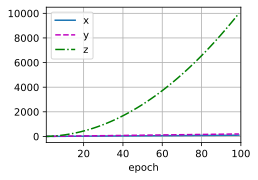

In [2]:
from func import  *
animator = Animator(xlabel='epoch', xlim=[1, 100], 
                            legend=['x', 'y', 'z'])
for i in range(100):
    x = i + 1
    y = x * 2
    z = x * x
    animator.add(i, (x, y, z))
    animator.fig.savefig("./tmp/result.jpg",dpi = 500, bbox_inches = 'tight')

In [5]:
import re
str='''
{"TimeStamp":"22:39:30.749", "Uname":"喜欢大的1", "Comment":"牛牛牛1", "Type":"弹幕", "SCTime":0}{"TimeStamp":"22:39:30.749", "Uname":"喜欢大的2", "Comment":"牛牛牛2", "Type":"弹幕", "SCTime":0}{"TimeStamp":"22:39:30.749", "Uname":"喜欢大的3", "Comment":"牛牛牛3", "Type":"弹幕", "SCTime":0}{"TimeStamp":"22:39:30.749", "Uname":"喜欢大的4", "Comment":"牛牛牛4", "Type":"弹幕", "SCTime":0}
'''
str=re.sub('{"TimeStamp":','\n',str)
# print(str)
def func(str):
    str=re.sub('"Uname":"','',str)
    str=re.sub('", "Comment":"','|',str)
    str=re.sub('", "Type"','',str)
    return str
a = re.findall(r'"Uname":".*", "Comment":".*", "Type"',str)
a = [func(i) for i in a]
print(a)



str='''
{"TimeStamp":"22:39:30.749", "Uname":"喜欢大的1", "Comment":"牛牛牛1", "Type":"弹幕", "SCTime":0}{"TimeStamp":"22:39:30.749", "Uname":"喜欢大的2", "Comment":"牛牛牛2", "Type":"弹幕", "SCTime":0}{"TimeStamp":"22:39:30.749", "Uname":"喜欢大的3", "Comment":"牛牛牛3", "Type":"弹幕", "SCTime":0}{"TimeStamp":"22:39:30.749", "Uname":"喜欢大的4", "Comment":"牛牛牛4", "Type":"弹幕", "SCTime":0}
'''
str=re.sub('{"TimeStamp":','\n',str)
a = re.findall(r'"Uname":"(.*)", "Comment":"(.*)", "Type"',str)
print(a)

['喜欢大的1|牛牛牛1', '喜欢大的2|牛牛牛2', '喜欢大的3|牛牛牛3', '喜欢大的4|牛牛牛4']
[('喜欢大的1', '牛牛牛1'), ('喜欢大的2', '牛牛牛2'), ('喜欢大的3', '牛牛牛3'), ('喜欢大的4', '牛牛牛4')]
